In [27]:
# loading housing dataset

from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets)=  boston_housing.load_data()

In [28]:
# exploratory

train_data.shape

(404, 13)

In [3]:
test_data.shape

(102, 13)

In [33]:
# need to normalize data



In [30]:
mean=train_data.mean(axis=0)
train_data -= mean

In [31]:
std= train_data.std(axis=0)
train_data /= std

In [32]:
test_data -= mean
test_data /= std

In [34]:
# building network: defining model

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [36]:
# using K-fold to validate

import numpy as np

k=4
num_val_samples = len(train_data) // k
num_epochs= 100
all_scores=[]
for i in range(k):
    print('processing fold #', i)
    val_data= train_data[i *  num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data =  np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model =  build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1, verbose=0)
    val_mae, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [37]:
# all validation scores
all_scores

[1.9309123754501343,
 2.3387398719787598,
 2.5432286262512207,
 2.3406319618225098]

In [38]:
# mean of all scores

np.mean(all_scores)

2.288378208875656

In [40]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_mae', 'loss', 'mae'])

In [41]:
# saving the validation logs at each fold

num_epochs=500
all_mae_histories =[]
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets= np.concatenate([train_targets[:i * num_val_samples], train_targets[(i + 1) * num_val_samples:]], axis=0)
    
    model= build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs= num_epochs, batch_size=1, verbose=0)
    mae_history= history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [42]:
# building history of successive mean k fold validation scores

average_mae_history= [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

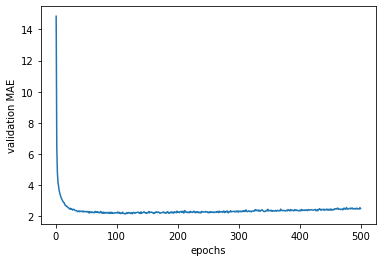

In [60]:
# plotting validation scores

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('epochs')
plt.ylabel('validation MAE')
plt.show()

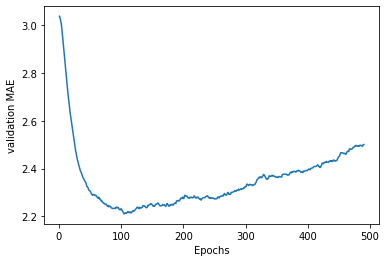

In [67]:
# Plotting validation scores but removing first 10 points. 

def smooth_curve(points, factor=0.9):
    smoothed_points= []
    for point in points:
        if smoothed_points:
            previous= smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('validation MAE')
plt.show()

In [ ]:
# training the final model


In [58]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score= model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 150us/step


In [59]:
test_mae_score

2.8621602058410645